<a href="https://colab.research.google.com/github/elmox0818/ai_learning/blob/master/RNN_END.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(リカレントニューラルネットワーク)

- 中間層が時系列で繋がっていて、重みやバイアスが持ち越されるため過去の情報を使える
- 勾配爆発
  - 学習時に層をさかのぼるにつれて勾配が大きくなりすぎる問題。勾配クリッピングなどで対処する。
- 勾配消失
  - 勾配が小さくなりすぎる問題。LSTMなどが有効。

## 勾配クリッピング

勾配の大きさに制限をかける。
L2ノルムが閾値より高い場合、以下の式で調整する。
> L2ノルム = 二乗の総和の平方根

$$
  勾配 → \frac{閾値}{L2ノルム}\times勾配
$$


## Kerasの基礎

### 学習用データの用意

Using matplotlib backend: agg


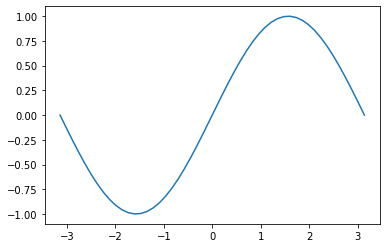

In [6]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi).reshape(-1, 1)
t = np.sin(x)

plt.plot(x, t)
plt.show()

## ニューラルネットワークの構築

Sequential()によりモデルを作成、addメソッドにより層を追加。
Dense()により通常の層を作ることができる。

In [8]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


## 学習

fit()メソッドを使う

In [9]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1) # 10%のデータを検証用に使う




Train on 45 samples, validate on 5 samples
Epoch 1/2000





45/45 [==============================] - 1s 12ms/step - loss: 0.5165 - val_loss: 0.0559
Epoch 2/2000
45/45 [==============================] - 0s 259us/step - loss: 0.4132 - val_loss: 0.0431
Epoch 3/2000
45/45 [==============================] - 0s 241us/step - loss: 0.3718 - val_loss: 0.0574
Epoch 4/2000
45/45 [==============================] - 0s 223us/step - loss: 0.3395 - val_loss: 0.0529
Epoch 5/2000
45/45 [==============================] - 0s 208us/step - loss: 0.3140 - val_loss: 0.0674
Epoch 6/2000
45/45 [==============================] - 0s 231us/step - loss: 0.3021 - val_loss: 0.0720
Epoch 7/2000
45/45 [==============================] - 0s 251us/step - loss: 0.2838 - val_loss: 0.1067
Epoch 8/2000
45/45 [==============================] - 0s 259us/step - loss: 0.2605 - val_loss: 0.1259
Epoch 9/2000
45/45 [==============================] - 0s 238us/step - loss: 0.2499 - val_loss: 0.1665
Epoch 10/2000
45/45 [===========

## 学習の推移

学習を表示する

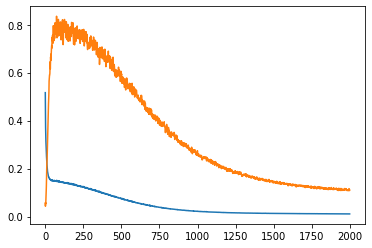

In [11]:
loss = history.history['loss'] # 訓練用データの誤差
vloss = history.history['val_loss'] # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()